# Resolver a Equação de Laplace

In [1]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

# Resolver a 2D

In [2]:
def laplace2d(phi: np.ndarray, solve: np.ndarray, eps: float=1e-6, omega: float=0.9) -> np.ndarray:
    """
        Resolve a equação de Laplace a 2D `nabla^2 phi = 0` numa grelha de pontos equidistantes usando o método de Gauss-Seidel com sobrerelaxação começando com estimativa inicial `phi` e terminando quando o passo em cada ponto for menor que `eps`.

        A matriz `solve` contém True caso o ponto esteja na área governada pela equação e contém False caso esteja na fronteira.
    """

    # Dimensões do problema
    Ny, Nx = phi.shape

    erro = eps + 1
    while erro > eps:
        erro = 0

        # Iterar sobre todos os pontos
        for i in range(Nx):
            for j in range(Ny):
                # Fazer um passo de Gauss-Seidel
                if solve[i, j]:
                    phinew = (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4
                    step = (1 + omega) * (phinew - phi[i, j])
                    phi[i, j] += step

                    # O erro é o maior passo que demos
                    erro = max(erro, abs(step))
    
    return phi

### Testar

Vamos usar o exemplo 9.1 do livro para testar.

In [3]:
# Parâmetros
N = 100

phi = np.zeros((N+1, N+1))
solve = np.full((N + 1, N + 1), True)

# Potencial no topo da caixa
phi[0, :] = 1

# Não resolver nas fronteiras
solve[0, :] = False
solve[N, :] = False
solve[:, 0] = False
solve[:, N] = False

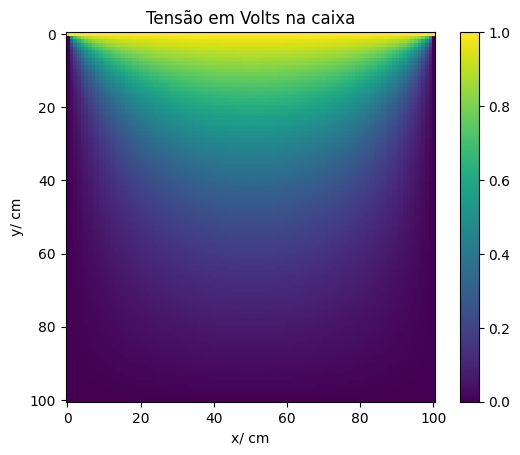

In [4]:
sol = laplace2d(phi, solve, 1e-5)

plt.imshow(sol)
plt.colorbar()
plt.title("Tensão em Volts na caixa")
plt.xlabel("x/ cm")
plt.ylabel("y/ cm")
plt.show()

# Resolver a 3D

In [5]:
def laplace3d(phi: np.ndarray, solve: np.ndarray, eps: float=1e-6, omega: float=0.9) -> np.ndarray:
    """
        Resolve a equação de Laplace a 3D `nabla^2 phi = 0` numa grelha de pontos equidistantes usando o método de Gauss-Seidel com sobrerelaxação começando com estimativa inicial `phi` e terminando quando o passo em cada ponto for menor que `eps`.

        A matriz `solve` contém True caso o ponto esteja na área governada pela equação e contém False caso esteja na fronteira.
    """

    # Dimensões do problema
    Nz, Ny, Nx = phi.shape

    erro = eps + 1
    while erro > eps:
        erro = 0

        # Iterar sobre todos os pontos
        for i in range(Nx):
            for j in range(Ny):
                for k in range(Nz):
                    # Fazer um passo de Gauss-Seidel
                    if solve[k, i, j]:
                        phinew = (phi[k, i + 1, j] + phi[k, i - 1, j] + phi[k, i, j + 1] + phi[k, i, j - 1] + phi[k + 1, i, j] + phi[k - 1, i, j]) / 6
                        step = (1 + omega) * (phinew - phi[k, i, j])
                        phi[k, i, j] += step

                        # O erro é o maior passo que demos
                        erro = max(erro, abs(step))
    
    return phi

### Testar

Vamos usar o exercício 3 da ficha 8, sendo que agora os condensadores são ~~diamantes~~ paus na camada $z = 50$ e a caixa é um cubo com potencial $0$.

In [6]:
# Parâmetros
N = 100

phi = np.zeros((N+1, N+1, N+1))
solve = np.full((N+1, N+1, N+1), True)

# Condições do problema
for i in range(N + 1):
    for j in range(N + 1):
        for k in range(N + 1):
            # Potencial na borda da caixa é 0 (não resolver nas fronteiras também)
            if i in [0, N] or j in [0, N] or k in [0, N]:
                solve[k, i, j] = False
            
            # Placa positiva
            elif (j == 20 and 20 <= i <= 80 and k == 50):
                phi[k, i, j] = 1
                solve[k, i, j] = False
            
            # Placa negativa
            elif (j == 80 and 20 <= i <= 80 and k == 50):
                phi[k, i, j] = -1
                solve[k, i, j] = False

In [7]:
sol = laplace3d(phi, solve, 1e-1)

KeyboardInterrupt: 

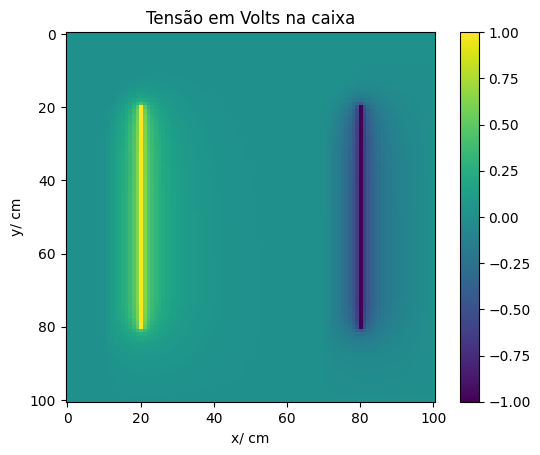

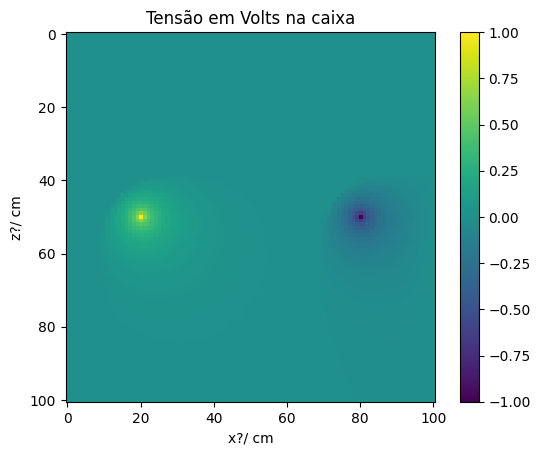

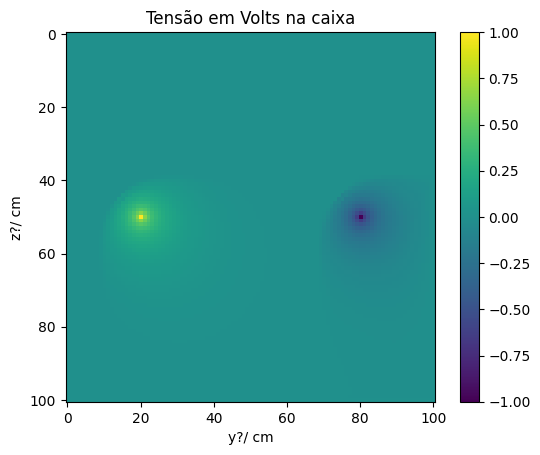

In [ ]:
# Vamos mostrar z == 50
plt.imshow(sol[50])
plt.colorbar()
plt.title("Tensão em Volts na caixa")
plt.xlabel("x/ cm")
plt.ylabel("y/ cm")
plt.show()

# Vamos mostrar y == 50
plt.imshow(sol[:, 50, :])
plt.colorbar()
plt.title("Tensão em Volts na caixa")
plt.xlabel("x?/ cm")
plt.ylabel("z?/ cm")
plt.show()

# Vamos mostrar x == 50
plt.imshow(sol[:, 50, :])
plt.colorbar()
plt.title("Tensão em Volts na caixa")
plt.xlabel("y?/ cm")
plt.ylabel("z?/ cm")
plt.show()